In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",header=None)

In [90]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [91]:
df.columns = ['symboling','normalized-losses','make','fuel-type','aspiration',
             'num-of-doors','body-style','drive-wheels','engine-location','wheel-base',
             'length','width','height','curb-weight','engine-type','num-of-cylinders',
             'engine-size','fuel-system','bore','stroke','compression-ratio',
             'horsepower','peak-rpm','city-mpg','highway-mpg','price']


In [92]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [95]:
#Data cleaning
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [96]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [97]:
df["normalized-losses"] =df["normalized-losses"].replace({"?":None})

In [98]:
df["normalized-losses"] =pd.to_numeric(df["normalized-losses"])

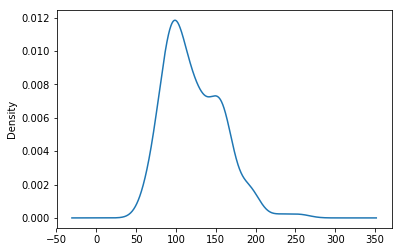

In [99]:
pd.Series(df['normalized-losses']).plot(kind='density')

In [100]:
df["normalized-losses"].median() #because there is skewness we use median, if it was normal we can have used mean

115.0

In [101]:
df['normalized-losses'].fillna(value=df['normalized-losses'].median(),inplace=True)

In [102]:
df['normalized-losses']

0      115.0
1      115.0
2      115.0
3      164.0
4      164.0
5      115.0
6      158.0
7      115.0
8      158.0
9      115.0
10     192.0
11     192.0
12     188.0
13     188.0
14     115.0
15     115.0
16     115.0
17     115.0
18     121.0
19      98.0
20      81.0
21     118.0
22     118.0
23     118.0
24     148.0
25     148.0
26     148.0
27     148.0
28     110.0
29     145.0
       ...  
175     65.0
176     65.0
177     65.0
178    197.0
179    197.0
180     90.0
181    115.0
182    122.0
183    122.0
184     94.0
185     94.0
186     94.0
187     94.0
188     94.0
189    115.0
190    256.0
191    115.0
192    115.0
193    115.0
194    103.0
195     74.0
196    103.0
197     74.0
198    103.0
199     74.0
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [103]:
df.describe(include='object') #finding if a numric column is been selected as categorical column(Example bore, stroke, horsepower etc are numerical)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,3,5,3,2,7,7,8,39,37,60,24,187
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,?
freq,32,185,168,114,96,120,202,148,159,94,23,20,19,37,4


In [104]:
df["bore"] =pd.to_numeric(df["bore"].replace({"?":None}))
df["stroke"] =pd.to_numeric(df["stroke"].replace({"?":None}))
df["horsepower"] =pd.to_numeric(df["horsepower"].replace({"?":None}))
df["peak-rpm"] =pd.to_numeric(df["peak-rpm"].replace({"?":None}))
df["price"] =pd.to_numeric(df["price"].replace({"?":None}))

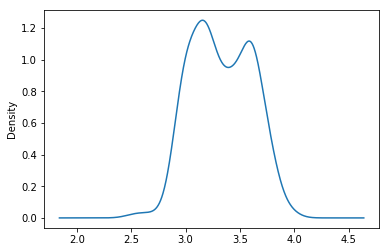

In [105]:
pd.Series(df['bore']).plot(kind='density')

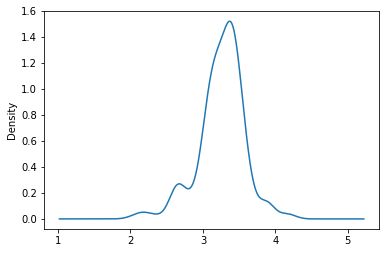

In [106]:
pd.Series(df['stroke']).plot(kind='density')

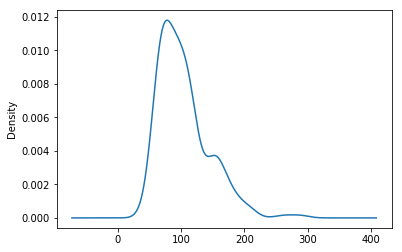

In [107]:
pd.Series(df['horsepower']).plot(kind='density')

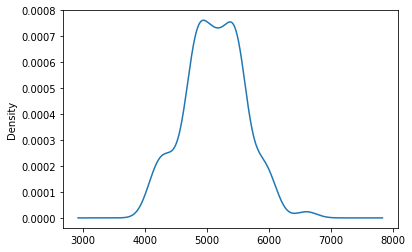

In [108]:
pd.Series(df['peak-rpm']).plot(kind='density')

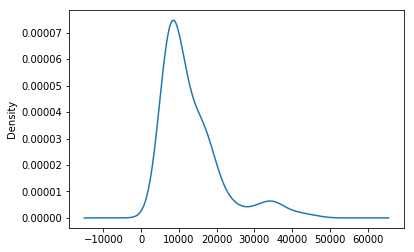

In [109]:
pd.Series(df['price']).plot(kind='density')

In [110]:
df['bore'].fillna(value=df['bore'].mean(),inplace=True)
df['stroke'].fillna(value=df['stroke'].mean(),inplace=True)
df['horsepower'].fillna(value=df['horsepower'].median(),inplace=True)
df['peak-rpm'].fillna(value=df['peak-rpm'].mean(),inplace=True)
df['price'].fillna(value=df['bore'].median(),inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-

In [112]:
df['symboling'] = df['symboling'].astype(str)

In [113]:
#dummy coding / dummy variable creation
df2 = pd.get_dummies(df[['symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']],drop_first=True) #add all the categorical objects

In [114]:
df2.head()

,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [115]:
df=pd.concat([df,df2],axis=1)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 82 columns):
symboling                  205 non-null object
normalized-losses          205 non-null float64
make                       205 non-null object
fuel-type                  205 non-null object
aspiration                 205 non-null object
num-of-doors               205 non-null object
body-style                 205 non-null object
drive-wheels               205 non-null object
engine-location            205 non-null object
wheel-base                 205 non-null float64
length                     205 non-null float64
width                      205 non-null float64
height                     205 non-null float64
curb-weight                205 non-null int64
engine-type                205 non-null object
num-of-cylinders           205 non-null object
engine-size                205 non-null int64
fuel-system                205 non-null object
bore                       205 non-null float6

In [123]:
df.drop(columns=['symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'],inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 71 columns):
normalized-losses          205 non-null float64
wheel-base                 205 non-null float64
length                     205 non-null float64
width                      205 non-null float64
height                     205 non-null float64
curb-weight                205 non-null int64
engine-size                205 non-null int64
bore                       205 non-null float64
stroke                     205 non-null float64
compression-ratio          205 non-null float64
horsepower                 205 non-null float64
peak-rpm                   205 non-null float64
city-mpg                   205 non-null int64
highway-mpg                205 non-null int64
price                      205 non-null float64
symboling_-2               205 non-null uint8
symboling_0                205 non-null uint8
symboling_1                205 non-null uint8
symboling_2                205 non-null uint8

In [126]:
#Train and Test split
y=df['price']
x=df.drop(columns=["price"])

In [132]:
from sklearn.cross_validation import train_test_split

In [143]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20)

In [144]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((164, 70), (41, 70), (164,), (41,))

In [145]:
from sklearn.linear_model import LinearRegression

In [146]:
model1=LinearRegression()
model1.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
model1.score(train_x,train_y)

0.9357489335066104

In [148]:
model1.score(test_x,test_y)

0.9131425163716089

In [150]:
y_pred=model1.predict(test_x)

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


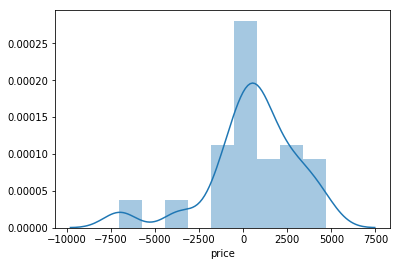

In [152]:
import seaborn as sns
sns.distplot(y_pred-test_y)

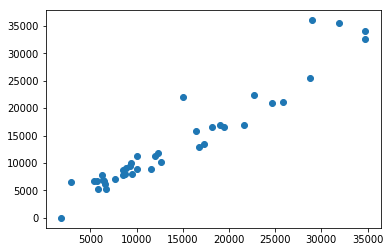

In [156]:
plt.scatter(y_pred,test_y)

# Problem Statements:
### What are the factors decide the price of a car in used car market?

In [161]:
coeff_df = pd.DataFrame(model1.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
normalized-losses,9.635876e+00
wheel-base,1.277671e+02
length,-1.076007e+02
width,8.519390e+02
height,2.952630e+01
curb-weight,4.615055e+00
engine-size,1.147554e+02
bore,-2.997612e+03
stroke,-1.312276e+03
compression-ratio,-9.050086e+02


In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV', data=df).fit()
lm.conf_int()

In [163]:
import statsmodels.api as sm

In [164]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     35.06
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           2.02e-61
Time:                        16:26:08   Log-Likelihood:                -1839.8
No. Observations:                 205   AIC:                             3814.
Df Residuals:                     138   BIC:                             4036.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
normalized-losses         

### What is the goodness of fit of the predictive model?

### How do you decide the parameters are optimal?

### Is there any violation of assumptions of mode (Stat)?

### How ML model is better than the stat model?